<a href="https://colab.research.google.com/github/usshaa/A-complete-guide-to-DL/blob/master/Mnist_Digit_Classification_with_LeNet_5_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [18]:
# Reshape to add channel dimension (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [19]:
# Resize images to 32x32 to match original LeNet input size
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

In [20]:
# Convert to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [21]:
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 32, 32, 1)
Test data shape: (10000, 32, 32, 1)


In [22]:
# Define LeNet-5 architecture
model = keras.Sequential([
    # First convolutional layer
    layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(32, 32, 1)),
    layers.AveragePooling2D(pool_size=2, strides=2),

    # Second convolutional layer
    layers.Conv2D(16, kernel_size=5, activation='tanh'),
    layers.AveragePooling2D(pool_size=2, strides=2),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dense(120, activation='tanh'),
    layers.Dense(84, activation='tanh'),
    layers.Dense(10, activation='softmax')
])

In [23]:
# Display model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.8265 - loss: 0.6213 - val_accuracy: 0.9551 - val_loss: 0.1497
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.9567 - loss: 0.1421 - val_accuracy: 0.9699 - val_loss: 0.0984
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9734 - loss: 0.0901 - val_accuracy: 0.9738 - val_loss: 0.0829
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.9803 - loss: 0.0665 - val_accuracy: 0.9761 - val_loss: 0.0722
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.9847 - loss: 0.0511 - val_accuracy: 0.9797 - val_loss: 0.0642
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9886 - loss: 0.0399 - val_accuracy: 0.9813 - val_loss: 0.0589
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.9908 - loss: 0.0317 - val_accuracy: 0.9824 - val_loss: 0.0562
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.9928 - loss: 0.0250 - 

In [26]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.9818
Test loss: 0.0605


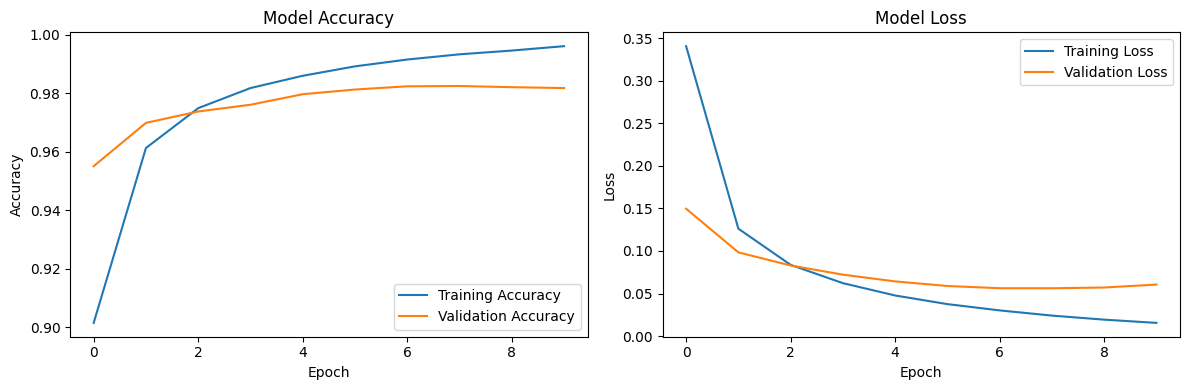

In [27]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Make predictions on a few test samples
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


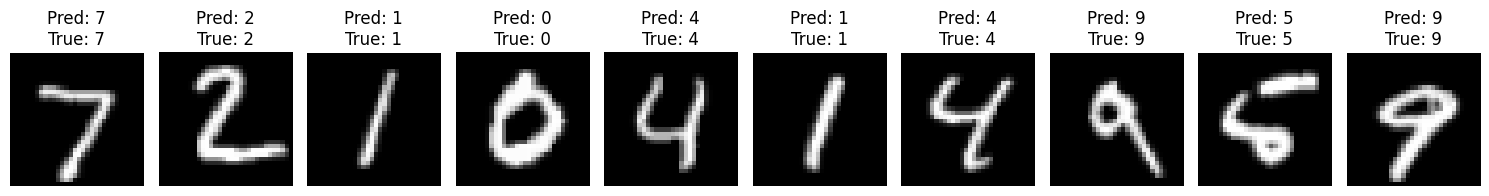

In [30]:
# Display some predictions
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].numpy().reshape(32, 32), cmap='gray') # Convert to NumPy array before reshaping
    plt.title(f'Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
print("Predictions vs True labels:")
for i in range(10):
    print(f"Sample {i}: Predicted = {predicted_classes[i]}, True = {true_classes[i]}")

Predictions vs True labels:
Sample 0: Predicted = 7, True = 7
Sample 1: Predicted = 2, True = 2
Sample 2: Predicted = 1, True = 1
Sample 3: Predicted = 0, True = 0
Sample 4: Predicted = 4, True = 4
Sample 5: Predicted = 1, True = 1
Sample 6: Predicted = 4, True = 4
Sample 7: Predicted = 9, True = 9
Sample 8: Predicted = 5, True = 5
Sample 9: Predicted = 9, True = 9
